🔹 Task 1: Comparative Study of Data Mining Techniques

🔸 Classification (Decision Tree):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Execution Time: 0.01004 seconds



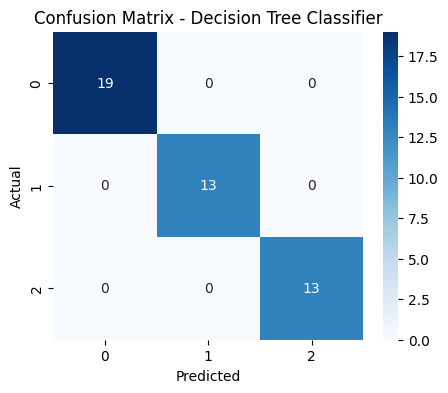

🔸 Regression (Linear Regression on California Housing):
Mean Squared Error: 0.5305677824766758
R² Score: 0.595770232606166
Execution Time: 0.07853 seconds



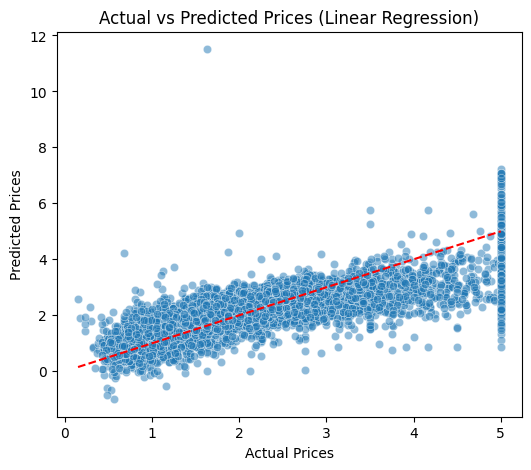

🔸 Clustering (KMeans on Iris Data):
Cluster Centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Execution Time: 0.41004 seconds



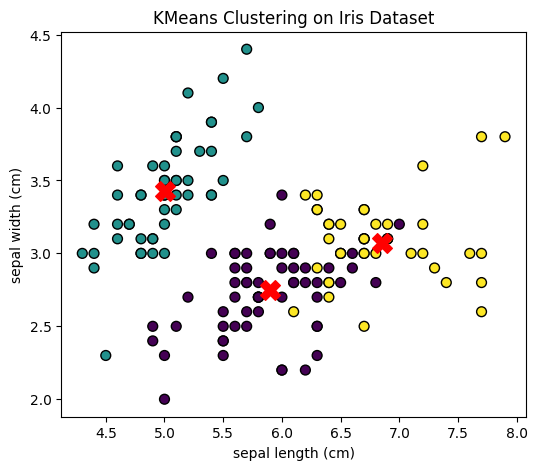

🔸 Association Rule Mining (Apriori):
Frequent Itemsets:
     support         itemsets
0  0.714286          (Bread)
1  0.714286         (Butter)
2  0.428571           (Eggs)
3  0.571429           (Milk)
4  0.428571  (Butter, Bread)
5  0.428571    (Milk, Bread)
6  0.428571   (Milk, Butter)

Generated Rules:
   antecedents consequents   support  confidence  lift
0    (Butter)     (Bread)  0.428571        0.60  0.84
1     (Bread)    (Butter)  0.428571        0.60  0.84
2      (Milk)     (Bread)  0.428571        0.75  1.05
3     (Bread)      (Milk)  0.428571        0.60  1.05
4      (Milk)    (Butter)  0.428571        0.75  1.05
5    (Butter)      (Milk)  0.428571        0.60  1.05
Execution Time: 0.02534 seconds


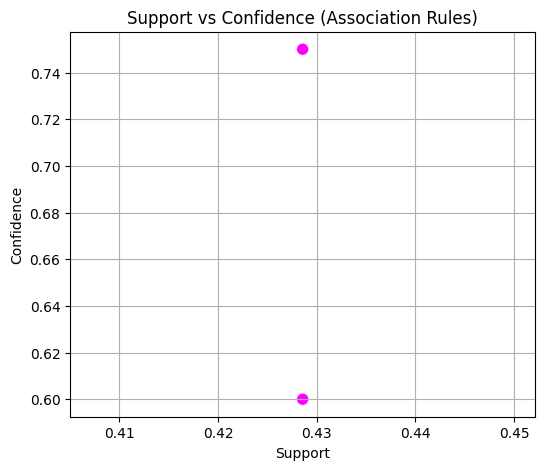

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

print("🔹 Task 1: Comparative Study of Data Mining Techniques\n")

# -----------------------------
# 1. Classification - Decision Tree
# -----------------------------
iris = load_iris()
X = iris.data
y = iris.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, random_state=42)

start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train_c, y_train_c)
y_pred_c = clf.predict(X_test_c)
end_time = time.time()

print("🔸 Classification (Decision Tree):")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c, average='macro'))
print("Recall:", recall_score(y_test_c, y_pred_c, average='macro'))
print("Execution Time:", round(end_time - start_time, 5), "seconds\n")

# 🔹 Visualization: Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# -----------------------------
# 2. Regression - California Housing
# -----------------------------
california = fetch_california_housing()
X_cal = pd.DataFrame(california.data, columns=california.feature_names)
y_cal = california.target

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_cal, y_cal, test_size=0.3, random_state=42)

start_time = time.time()
reg = LinearRegression()
reg.fit(X_train_r, y_train_r)
y_pred_r = reg.predict(X_test_r)
end_time = time.time()

print("🔸 Regression (Linear Regression on California Housing):")
print("Mean Squared Error:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", reg.score(X_test_r, y_test_r))
print("Execution Time:", round(end_time - start_time, 5), "seconds\n")

# 🔹 Visualization: Actual vs Predicted
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.5)
plt.plot([min(y_test_r), max(y_test_r)], [min(y_test_r), max(y_test_r)], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()


# -----------------------------
# 3. Clustering - KMeans
# -----------------------------
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
end_time = time.time()

print("🔸 Clustering (KMeans on Iris Data):")
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Execution Time:", round(end_time - start_time, 5), "seconds\n")

# 🔹 Visualization: Clusters (first two features)
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KMeans Clustering on Iris Dataset")
plt.show()


# -----------------------------
# 4. Association Rule Mining - Apriori
# -----------------------------
dataset = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Eggs'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
    ['Bread', 'Butter'],
    ['Milk', 'Butter'],
    ['Milk', 'Bread'],
    ['Butter', 'Eggs']
]

te = TransactionEncoder()
te_data = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)

start_time = time.time()
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
end_time = time.time()

print("🔸 Association Rule Mining (Apriori):")
print("Frequent Itemsets:\n", frequent_itemsets)
print("\nGenerated Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("Execution Time:", round(end_time - start_time, 5), "seconds")

# 🔹 Visualization: Support vs Confidence
plt.figure(figsize=(6, 5))
sns.scatterplot(x=rules['support'], y=rules['confidence'], size=rules['lift'], hue=rules['lift'], palette='cool', legend=False)
plt.title("Support vs Confidence (Association Rules)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.show()
